# CO542 - Neural Networks and Fuzzy Systems
## E/19/129 - K.H. Gunawardana

### Lab 01: Introduction to Perceptron

#### **Task 01:  Manual vs. Library Implementation of a Perceptron**

In [1]:
# import libs
import numpy as np
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# Step 1: Define the Dataset
# Define input and output for the AND Gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

In [3]:
# Step 2: Manual Implementation of Perceptron
def step_function(x):
    return 1 if x >= 0 else 0

def perceptron_training(X, y, learning_rate=0.1, epochs=10):
    weights = np.zeros(X.shape[1])
    bias = 0
    for _ in range(epochs):
        for i in range(len(X)):
            activation = np.dot(X[i], weights) + bias
            prediction = step_function(activation)

            error = y[i] - prediction
            weights += learning_rate * error * X[i]
            bias += learning_rate * error

    return weights, bias

# Train manually
weights, bias = perceptron_training(X, y)

print("Manual Weights:", weights)
print("Manual Bias:", bias)

Manual Weights: [0.2 0.1]
Manual Bias: -0.20000000000000004


In [4]:
# Step 3: Ready-Made Implementation using sklearn
model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
model.fit(X, y)

print("Sklearn Weights:", model.coef_)
print("Sklearn Bias:", model.intercept_)

Sklearn Weights: [[0.2 0.2]]
Sklearn Bias: [-0.2]


In [5]:
# Step 4: Compare Results
# Predictions
manual_predictions = [step_function(np.dot(x, weights) + bias) for x in X]

sklearn_predictions = model.predict(X)

print("Manual Predictions:", manual_predictions)
print("Sklearn Predictions:", sklearn_predictions)

Manual Predictions: [0, 0, 0, 1]
Sklearn Predictions: [0 0 0 1]


### Questions

#### Q1. What are the similarities and differences between manual implementation and Sklearn's model?

##### Similarities
- Functionality: Both implementations successfully learn the AND gate behavior and produce the correct output: [0, 0, 0, 1].
- Activation function: Both use a step function to determine the output (i.e., output is 1 if activation ≥ 0, else 0).
- Learning rule: Both apply the perceptron learning algorithm, adjusting weights based on the error (error = y - prediction).

##### Differences
- Weight initialization:
  - Manual: Starts with all weights set to zero.
  - Sklearn: Initializes weights randomly or with small non-zero values (controlled by random_state).
  
- Training mechanism:
  - Manual: Uses online learning, updating weights after each training example and runs for a fixed number of epochs.
  - Sklearn: Uses batch updates internally, with data shuffling, and automatically stops if convergence is reached.

- Convergence and optimization:
  - Manual: Does not check for convergence; training may continue unnecessarily.
  - Sklearn: Efficiently detects convergence and stops early, saving time.

- Flexibility and features:
  - Manual: Basic and minimal, useful for educational purposes.
  - Sklearn: Offers additional features such as regularization, different learning rate schedules, and integration with pipelines.

#### Q2. Why is it beneficial to use libraries like sklearn in practice?

- Efficiency: Highly optimized code performs better and trains faster, especially on large datasets.
- Reliability: Reduces the chance of implementation errors (e.g., incorrect updates, wrong bias handling).
- Scalability: Easily scales from small problems (like AND gates) to large, real-world datasets and models.


### **Task 02: Logical Gate Classification**

In [6]:
# Define a logic gate input and output for AND, OR, NOT, XOR
and_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_output = np.array([0, 0, 0, 1])

or_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
or_output = np.array([0, 1, 1, 1])

not_input = np.array([[0], [1]])
not_output = np.array([1, 0])

xor_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_output = np.array([0, 1, 1, 0])

In [7]:
# define a function to train the perceptron for different gates
# X - input data, y - output data, gate_type - type of gate (AND, OR, NOT, XOR)
def train(X, y, gate_type="AND"):
    model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
    model.fit(X, y)

    y_pred = model.predict(X)
    print(f"{gate_type} Gate - Accuracy: {accuracy_score(y, y_pred):.2f}")

    if X.shape[1] == 2:
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
        plt.title(f"{gate_type} Gate Decision Boundary")
        plt.xlabel('Input 1')
        plt.ylabel('Input 2')
        plt.show()

    elif X.shape[1] == 1:
        # For NOT gate (1 feature)
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        
        x_plot = np.linspace(x_min, x_max, 100).reshape(-1, 1)
        y_plot = model.predict(x_plot)

        plt.plot(x_plot, y_plot, color='blue', linewidth=2)
        plt.scatter(X[:, 0], y, color='red', edgecolor='k')
        plt.title(f"{gate_type} Gate Decision Boundary")
        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.ylim(-0.5, 1.5)
        plt.grid(True)
        plt.show()

    else:
        print("Unsupported input dimension for plotting.")

    return model

AND Gate - Accuracy: 1.00


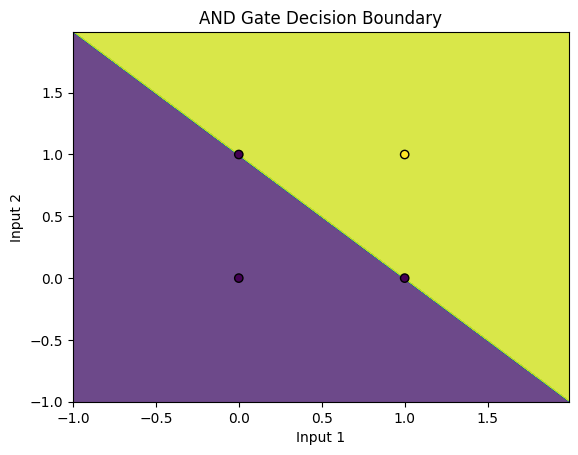

Perceptron(eta0=0.1, random_state=42)

In [8]:
# Train and visualize the AND gate
train(and_input, and_output)

OR Gate - Accuracy: 1.00


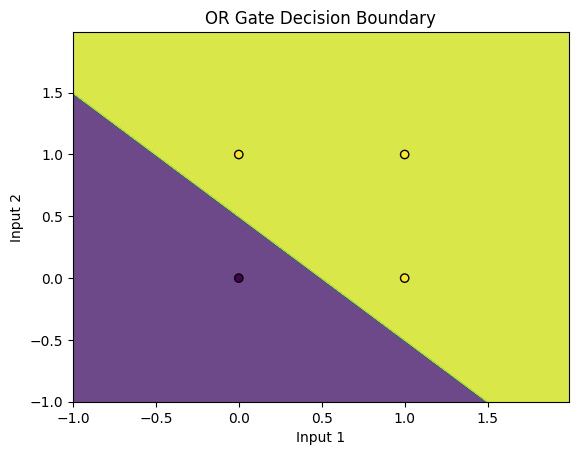

Perceptron(eta0=0.1, random_state=42)

In [9]:
# Train and visualize the OR gate
train(or_input, or_output, gate_type="OR")

NOT Gate - Accuracy: 1.00


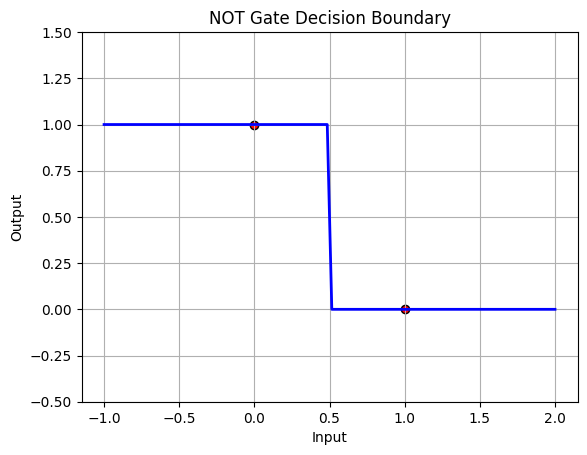

Perceptron(eta0=0.1, random_state=42)

In [10]:
# Train and visualize the NOT gate
train(not_input, not_output, gate_type="NOT")

XOR Gate - Accuracy: 0.50


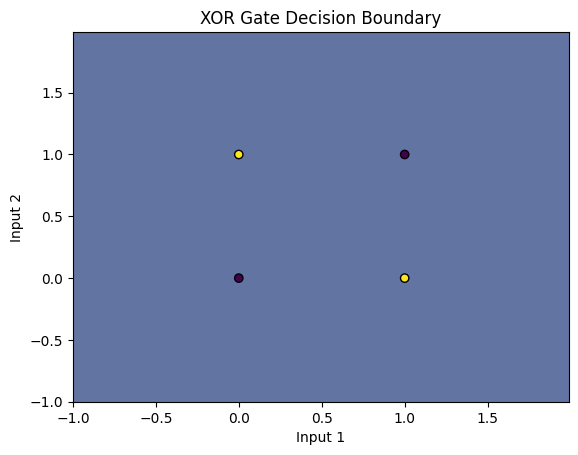

Perceptron(eta0=0.1, random_state=42)

In [11]:
# Train and visualize the XOR gate
train(xor_input, xor_output, gate_type="XOR")

Learning Rate: 0.001, Accuracy: 0.75
Learning Rate: 0.01, Accuracy: 1.00
Learning Rate: 0.1, Accuracy: 1.00
Learning Rate: 0.5, Accuracy: 1.00
Learning Rate: 1.0, Accuracy: 1.00
Learning Rate: 5.0, Accuracy: 1.00


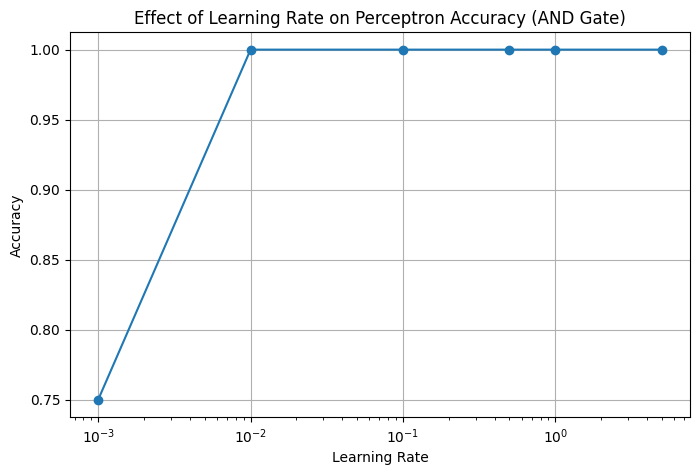

In [ ]:
# Learning rates to test
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0, 5.0]
accuracies = []

# Train and record accuracy for each learning rate
for lr in learning_rates:
    model = Perceptron(max_iter=1000, eta0=lr, random_state=42)
    model.fit(X, y)
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    accuracies.append(acc)
    print(f"Learning Rate: {lr}, Accuracy: {acc:.2f}")

# Plotting learning rate vs. accuracy
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, accuracies, marker='o', linestyle='-')
plt.title('Effect of Learning Rate on Perceptron Accuracy (AND Gate)')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xscale('log') 
plt.grid(True)
plt.show()

### Questions

#### Why does a single-layer perceptron fail for certain logic gates, and which ones?

A single-layer perceptron can only solve problems that are linearly separable. This means it can successfully learn logic gates like AND, OR, and NOT because their outputs can be separated by a straight line (or a hyperplane in higher dimensions).

However, it fails for the XOR gate. The XOR gate's outputs cannot be separated by a single straight line, there is no linear boundary that divides the true and false outputs for XOR. Therefore, a single-layer perceptron cannot learn the XOR function.

| Logic Gate | Linearly Separable | Perceptron Success? |
|------------|--------------------|---------------------|
| AND        | Yes                | Yes                 |
| OR         | Yes                | Yes                 |
| NOT        | Yes                | Yes                 |
| XOR        | No                 | No                  |

#### How does adjusting the learning rate affect the perceptron’s performance?

- Low learning rate: Training progresses slowly and requires more epochs to converge, but the weight updates are stable and less likely to overshoot the optimal solution.
- High learning rate: The perceptron learns faster but may overshoot the optimal weights, leading to instability or failure to converge.
- Appropriate learning rate: Ensures efficient and stable convergence. For example, a learning rate of 0.1 provided good results for the AND, OR, and NOT gates.



### **Task 03: Effect of Outliers on Training**

In [ ]:
# Step 1: Generate Data
# Generate two Gaussian distributions
class1 = np.random.multivariate_normal([2, 2], [[1, 0], [0, 1]], 100)
class2 = np.random.multivariate_normal([5, 5], [[1, 0], [0, 1]], 100)

# Add an outlier
class2 = np.vstack([class2, [10, 10]])

# Labels
X = np.vstack([class1, class2])
y = np.hstack([np.ones(100), -np.ones(101)])

In [14]:
# Step 2: Train the Perceptron
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)

model.fit(X_train, y_train)

Perceptron(eta0=0.1, random_state=42)

In [15]:
# Step 3: Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9836065573770492


### Questions

#### How does the presence of outliers affect training time and accuracy?

- The perceptron model achieved 98.36% accuracy despite the presence of an outlier, showing reasonable resilience.
- Outliers generally:
  - Increase training time as the model struggles to converge on a clean boundary.
  - Shift the decision boundary, leading to less optimal separation for the majority of data.
  - Decrease generalization performance, especially on test data that follows the original distribution.

#### What strategies can be used to mitigate the effect of outliers?

- Data Preprocessing
  - Remove extreme data points using statistical techniques like z-score or interquartile range (IQR).
  - Use anomaly detection algorithms to flag and possibly exclude unusual data points.

- Algorithm Modifications
  - Add regularization terms to penalize large weight updates caused by outliers.
  - Use modified perceptron algorithms that introduce margin-based constraints.
  - Apply robust models like RANSAC, which iteratively fits models excluding suspected outliers.

- Alternative Approaches
  - Switch to more robust classifiers like support vector machines with soft margins.
  - Use ensemble techniques like bagging or boosting to minimize the impact of single outlier points.
  - Apply weighted learning to reduce the importance of samples that deviate significantly from the majority.

### **Task 04: Real-World Classification**

In [21]:
# Step 1: Load the Dataset
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

In [22]:
digits = load_digits()

mask = (digits.target == 0) | (digits.target == 1)

X = digits.data[mask]
y = digits.target[mask]

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [23]:
# Step 2: Train the Perceptron
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
model.fit(X_train, y_train)

Perceptron(eta0=0.1, random_state=42)

In [24]:
# Step 3: Evaluate Performance
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[56  0]
 [ 0 52]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        52

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108



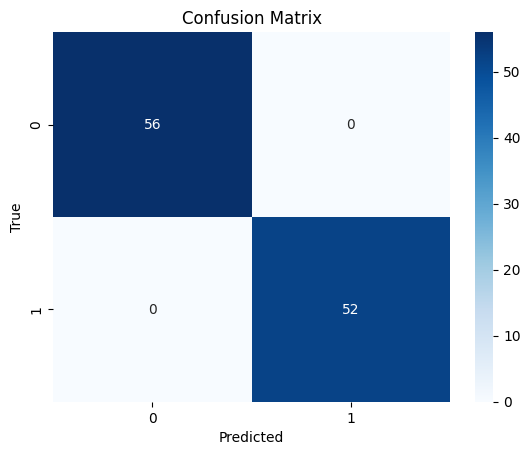

In [25]:
# Step 4: Visualize Confusion Matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix");plt.xlabel("Predicted");plt.ylabel("True")
plt.show()

### Questions

#### What changes would you make to improve accuracy?

- Model Enhancements
    - **Multi-layer Neural Network**: Replace the perceptron with a multi-layer neural network (MLP) to capture non-linear patterns in digit images.
    - **Regularization**: Introduce L1 or L2 regularization (`alpha` parameter in `Perceptron`) to prevent overfitting and improve generalization.
    - **Kernel Methods**: Switch to non-linear models like `KernelPerceptron` or Support Vector Machines (SVM) with RBF or polynomial kernels for better boundary modeling.

- Data Processing Improvements
    - **Feature Selection**: Remove non-informative pixels or focus on the most active areas in the digit images.
    - **Feature Engineering**: Use shape-based features (e.g., histogram of oriented gradients, pixel transitions) that better represent digit characteristics.
    - **Dimensionality Reduction**: Apply techniques like PCA to reduce noise and emphasize key patterns.
    - **Data Augmentation**: Slightly rotate, scale, or shift digits to expand the training set and improve robustness.

- Training Optimizations
    - **Hyperparameter Tuning**: Use tools like `GridSearchCV` to optimize `eta0`, `max_iter`, and `alpha` values.
    - **Early Stopping**: Monitor performance on a validation set to stop training when accuracy plateaus.
    - **Ensemble Methods**: Use bagging or boosting to combine predictions from multiple weak models for a stronger classifier.
    - **Class Weights**: If class imbalance exists, set `class_weight='balanced'` to ensure fair treatment of both classes.

- Evaluation Strategy
    - **Cross-Validation**: Replace simple train-test split with k-fold cross-validation for a more reliable performance estimate.
    - **Error Analysis**: Visualize and analyze misclassified samples to identify systematic patterns or difficult cases.
